#Introducción

Tenemos el trabajo de realizar un algoritmo que pueda predecir y clasificar con la mayor precisión posible distintos tipos de mails en spam o no spam.

El objetivo es entonces poder elegir un conjunto de datos que nos permita realizar un análisis y modificarlo a nuestra conveniencia, para poder hacer uso de distintos algoritmos de predicción y clasificación y sacar conclusiones.

Esta presentación estará organizada de la siguiente manera:

En primer lugar se elegirá un dataset conveniente y se procederá a explicar el significado de cada columna.

Luego, se realizará una exploración de datos de este dataset con el objetivo de destacar las características más importantes del mismo y realizar modificaciones si es necesario.

A continuación, se presentarán distintas visualizaciones para ilustrar estas características y poder tener un enfoque inicial acerca de los modelos a utilizar.

Por último, se utilizarán distintos modelos para intentar resolver el problema de clasificación. Estos modelos tendrán distintas precisiones, pero también será importante destacar las distintas utilidades que pueden tener según el enfoque que se busque en el contexto de nuestro problema. También se presentará una conclusión final.

In [213]:
# La librería pandas nos permitirá crear nuestro dataframe.
import pandas as pd

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset elegido

Para este caso se eligió un dataset que consta de 5172 filas y 3002 columnas.

Cada fila representa un email mientras que la primera columna representa el número de mail y la última columna (Prediction) representa si el email es spam (1) o no es spam (0).

Las 3000 columnas restantes representan cada una una palabra, dónde el valor indica la cantidad de veces que esa palabra se repite en un mail.

La variable que nos interesa predecir a partir de los datos que tenemos y en la que se basará todo nuestro análisis es la que representa la ya mencionada columna ‘Prediction’.

In [215]:
# OPCIÓN 1: Cargamos el dataset desde Google Drive.
df = pd.read_csv('drive/MyDrive/Colab Notebooks/emails.csv')

In [216]:
# OPCIÓN 2: Cargamos el dataset desde un archivo local.
#df = pd.read_csv("emails.csv")

In [217]:
df.shape

(5172, 3002)

In [218]:
# Imprimo las primeras 5 filas para obtener una vista previa del dataframe.

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


#Exploración de datos (EDA)

En esta sección vamos a analizar a través de gráficos realizados mediante las librerías "matplotlib" y "seaborn" distintas características relevantes acerca de nuestro dataset.

También realizaremos algunas modificaciones agregando nuevas columnas con datos importantes generados a partir de las columnas ya existentes, las cuáles nos brindarán información que esté más directamente relacionada con la variable a predecir.

Con estos gráficos, se busca representar datos que nos puedan ser útiles para identificar patrones y relaciones que a su vez también nos pueden ser de ayuda para el uso de algoritmos predictivos.

Con los datos proporcionados por la función describe() podemos ver algunas características, como por ejemplo la palabra más repetida dentro de un solo mail o las palabras que están presentes en todos los mails

In [220]:
df_info = df.describe()
df_info

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [221]:
# La palabra que más se repite dentro de un solo mail
max = df_info.loc['max'].max()
max_column_name = df_info.loc['max'].idxmax()
print("Palabra más repetida dentro de un mail: " + max_column_name + " con " + str(max) + " repeticiones")

# Las palabras que tienen valor mínimo mayor a 0, es decir, están presentes en todos los mails
columnas_con_min_mayor_a_0 = df_info.columns[df_info.loc['min'] > 0]
print("Palabras que están presentes en todos los mails: " + str(columnas_con_min_mayor_a_0.values))

Palabra más repetida dentro de un mail: e con 2327.0 repeticiones
Palabras que están presentes en todos los mails: ['ect' 'e' 't' 'j' 'b' 'c' 'u' 'ct']


In [222]:
# Creamos una copia del dataframe original para poder modificarlo a lo largo de la exploración de datos sin modificar el conjunto de datos original.
df_copia = df.copy()


##Modificación del dataset

Para nuestro análisis, en principio, todas las columnas nos serán útiles en nuestra tarea de identificar información relevante.

Sin embargo, con el fin de tratar de realizar el análisis con expresiones que puedan ser identificables, consideraremos solo las expresiones o palabras que contengan 3 o más caracteres. De esta manera se eliminan las expresiones de un solo caracter y conectores de 2 caracteres que están presentes en la mayoría de mails sin proporcionarnos información relevante. Esto aplicará para todo el desarrollo que se va a presentar.

In [223]:
df_copia = df.filter(regex='^[^\W\d_]{3,}$', axis=1)
df_copia.head()

,the,ect,and,for,you,hou,this,enron,that,will,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,dry,Prediction
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,24,6,6,1,27,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,0,5,2,10,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,17,1,5,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Columna añadida: Palabras totales

En base a la suma de las repeticiones de cada palabra para cada fila, creamos una nueva columna "palabras_totales" con el objetivo de utilizarla como feature en el posterior análisis.

In [224]:
df_copia['palabras_totales'] = df_copia.drop(['Prediction'], axis=1).sum(axis=1)

<ipython-input-224-a2285a5b4539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['palabras_totales'] = df_copia.drop(['Prediction'], axis=1).sum(axis=1)


###Columna añadida: Contador de palabras de spam

En base a una selección de palabras que son comunes en correos electrónicos que son spam, realizamos una suma de la cantidad de repeticiones de estas palabras en cada mail y colocamos el valor en una nueva columna "cantidad_palabras_spam".

In [225]:
# Palabras comunes asociadas a correos electrónicos clasificados como spam.
spam_keywords = [
    'buy', 'free', 'viagra', 'click', 'subscribe', 'cheap', 'discount',
    'promotion', 'money', 'guarantee', 'credit', 'loan', 'winner',
    'urgent', 'limited', 'offer', 'risk-free', 'lowest price', 'prize',
    'insurance', 'pharmacy', 'billion', 'million', 'cash', 'bonus'
]

spam_columns = [col for col in df_copia.columns if col.lower() in spam_keywords]

# Si ninguna de las columnas coincide con las palabras de spam, colocamos el valor 0.
if not spam_columns:
    print("No hay columnas que coincidan con las palabras de spam.")
    df_copia['cantidad_palabras_spam'] = 0
else:
    # Sumar los valores de esas columnas para cada fila
    df_copia['cantidad_palabras_spam'] = df[spam_columns].sum(axis=1)

<ipython-input-225-54686ab7bb24>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['cantidad_palabras_spam'] = df[spam_columns].sum(axis=1)


###Columna añadida: Promedio de longitud de las palabras

En este caso generamos una nueva columna "longitud_media" con la longitud media de las palabras presentes en cada mail.

In [226]:
# Extrayendo los nombres de las columnas, que representan cada palabra
word_columns = [col for col in df_copia if col not in ['Prediction', 'palabras_totales', 'cantidad_palabras_spam']]

# Se Crea un diccionario que mapea cada palabra a su longitud
word_lengths = {word: len(word) for word in word_columns}

# Función para calcular la longitud media
def mean_word_length(row):
    total_length = 0
    total_words = 0
    for word in word_columns:
        word_count = row[word]
        word_len = word_lengths[word]
        total_length += word_count * word_len
        total_words += word_count
    return total_length / total_words if total_words > 0 else 0

# Aplicar la función a cada fila del DataFrame
df_copia['longitud_media'] = df_copia.apply(mean_word_length, axis=1)

<ipython-input-226-78f8cf2b915f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['longitud_media'] = df_copia.apply(mean_word_length, axis=1)


Con las columnas añadidas, el dataframe queda de la siguiente manera:

In [227]:
df_copia.head(10)

,the,ect,and,for,you,hou,this,enron,that,will,...,valued,lay,infrastructure,military,allowing,dry,Prediction,palabras_totales,cantidad_palabras_spam,longitud_media
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,5.833333
1,8,24,6,6,1,27,0,1,2,0,...,0,0,0,0,0,0,0,421,0,4.486936
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,4.454545
3,0,22,0,5,2,10,2,0,0,0,...,0,0,0,0,0,0,0,191,0,4.324607
4,7,17,1,5,0,9,2,0,0,0,...,0,0,0,0,0,0,0,193,0,4.476684
5,4,1,4,2,1,0,1,0,0,0,...,0,0,0,0,0,0,1,186,0,4.494624
6,5,1,3,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,107,1,4.121495
7,0,2,3,1,6,0,0,0,0,1,...,0,0,0,0,0,0,1,90,2,4.588889
8,2,3,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,77,1,4.519481
9,4,35,0,1,1,16,0,0,0,2,...,0,0,0,0,0,0,0,195,0,4.394872


Estas columnas añadidas nos brindan información importante en cuanto a su relación con la predicción de spam.

##Análisis del dataset

A continuación se presentarán distintos gráficos que nos permiten visualizar información relevante de nuestro dataset.

In [228]:
# Para este análisis usaremos las siguientes librerías:

import matplotlib.pyplot as plt
import seaborn as sns

####Distribución de la cantidad de palabras

Graficamos en un boxplot a modo de poder visualizar que cantidad de mails existen por encima de la media de cantidad de palabras.

Text(0, 0.5, 'Cantidad Total de Palabras por Correo')

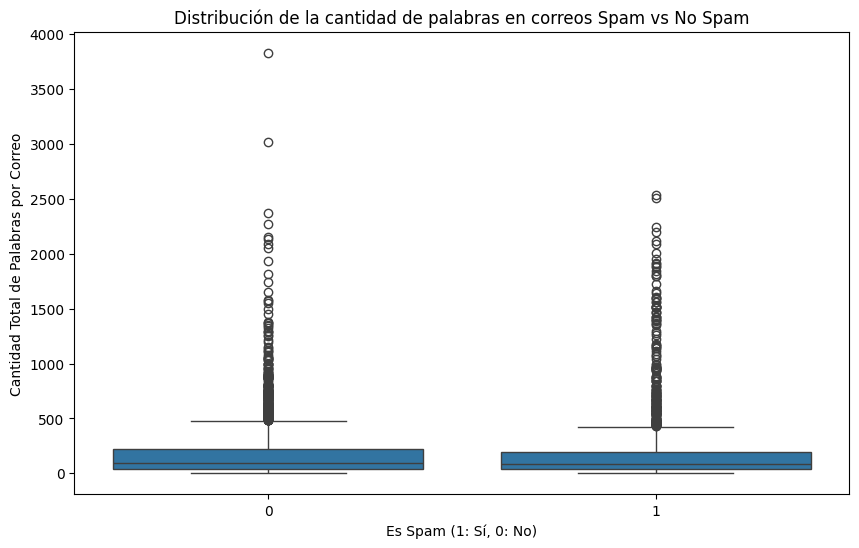

In [229]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediction', y='palabras_totales', data=df_copia)
plt.title('Distribución de la cantidad de palabras en correos Spam vs No Spam')
plt.xlabel('Es Spam (1: Sí, 0: No)')
plt.ylabel('Cantidad Total de Palabras por Correo')

###Longitud media de palabras en cada mail

Podemos también realizar un boxplot para ver la distribución de la longitud media de palabras presentes en cada mail.

Text(0.5, 0, 'Mails')

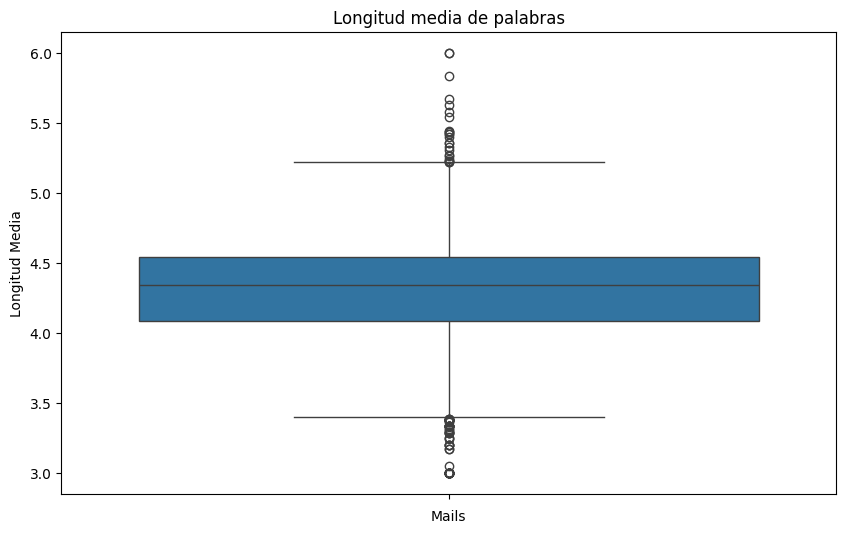

In [230]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_copia["longitud_media"])
plt.title('Longitud media de palabras')
plt.ylabel('Longitud Media')
plt.xlabel('Mails')

###Concentración de mails respecto a la cantidad total de palabras

Se realiza un gráfico de tipo scatterplot para visualizar la concentración de mails clasificados como spam o no spam en función de la cantidad de palabras

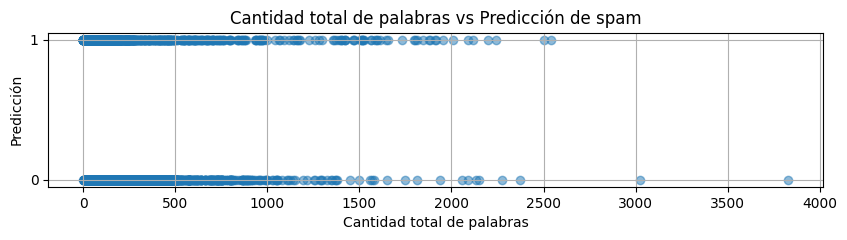

In [231]:
plt.figure(figsize=(10, 2))
plt.scatter(df_copia['palabras_totales'], df_copia['Prediction'], alpha=0.5)
plt.title('Cantidad total de palabras vs Predicción de spam')
plt.xlabel('Cantidad total de palabras')
plt.ylabel('Predicción')
plt.yticks([0, 1]) # Establecemos solo 0 y 1 como valores del eje Y.
plt.grid(True)
plt.show()


###Concentración de mails respecto a la cantidad total de palabras comunes de spam

En este caso realizamos un gráfico similar, pero ahora considerando la cantidad total de palabras comunes relacionadas al spam.

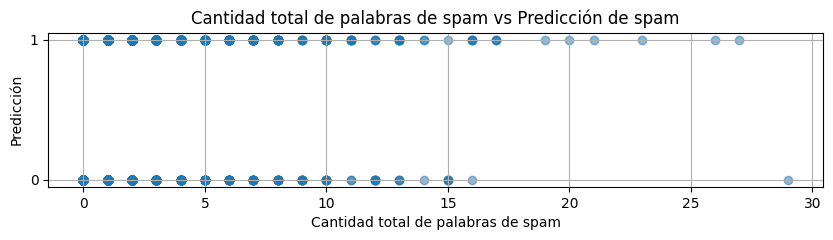

In [232]:
plt.figure(figsize=(10, 2))
plt.scatter(df_copia['cantidad_palabras_spam'], df_copia['Prediction'], alpha=0.5)
plt.title('Cantidad total de palabras de spam vs Predicción de spam')
plt.xlabel('Cantidad total de palabras de spam')
plt.ylabel('Predicción')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

###Top 30 palabras más repetidas para spam/no spam

Se realiza un gráfico de barras que muestra la cantidad de repeticiones de las 30 palabras más repetidas existentes entre los mails que son spam y los que no.

In [233]:
#Se crean dos dataframes distintos. Uno contiene los mails que son spam (Prediction = 1), y otro contiene los mails que NO son spam (Prediction = 0).
df_prediction_1 = df_copia[df_copia['Prediction'] == 1].drop(["Prediction", "palabras_totales", "cantidad_palabras_spam", "longitud_media"], axis=1)
df_prediction_0 = df_copia[df_copia['Prediction'] == 0].drop(["Prediction", "palabras_totales", "cantidad_palabras_spam", "longitud_media"], axis=1)

# Se crean dos series distintas que contienen todas las palabras y la suma total de apariciones para ambos casos.
suma_palabras_prediction_1 = df_prediction_1.sum()
suma_palabras_prediction_1 = suma_palabras_prediction_1.drop(suma_palabras_prediction_1.index[-1]) # Elimino la última fila que pertenece a la columna 'Prediction'

suma_palabras_prediction_0 = df_prediction_0.sum()
suma_palabras_prediction_0 = suma_palabras_prediction_0.drop(suma_palabras_prediction_0.index[-1]) # Elimino la última fila que pertenece a la columna 'Prediction'

In [234]:
# Se ordena cada una de estas series de manera de poder seleccionar las 30 primeras, que van a corresponder a las 30 palabras con más apariciones
suma_palabras_prediction_1_ordenado = suma_palabras_prediction_1.sort_values(ascending=False)
top30_palabras_prediction_1 = suma_palabras_prediction_1_ordenado.head(30)

suma_palabras_prediction_0_ordenado = suma_palabras_prediction_0.sort_values(ascending=False)
top30_palabras_prediction_0 = suma_palabras_prediction_0_ordenado.head(30)

Primero se representan las 30 palabras más repetidas para el caso de los mails que están clasificados como spam.

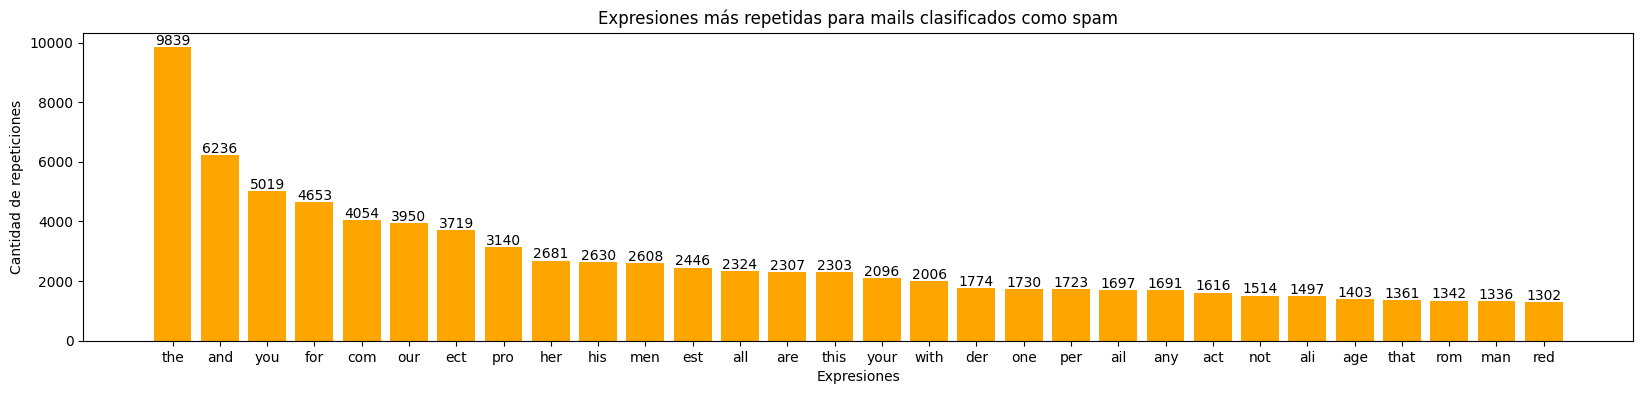

In [235]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.bar(top30_palabras_prediction_1.index, top30_palabras_prediction_1.values, color="orange")

ax.set_xlabel('Expresiones')
ax.set_ylabel('Cantidad de repeticiones')
ax.set_title('Expresiones más repetidas para mails clasificados como spam')

labels = top30_palabras_prediction_1.tolist()
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 450, label, ha="center", va="top"
    )

Segundo se representan las 30 palabras más repetidas para el caso de los mails que están clasificados como NO spam.

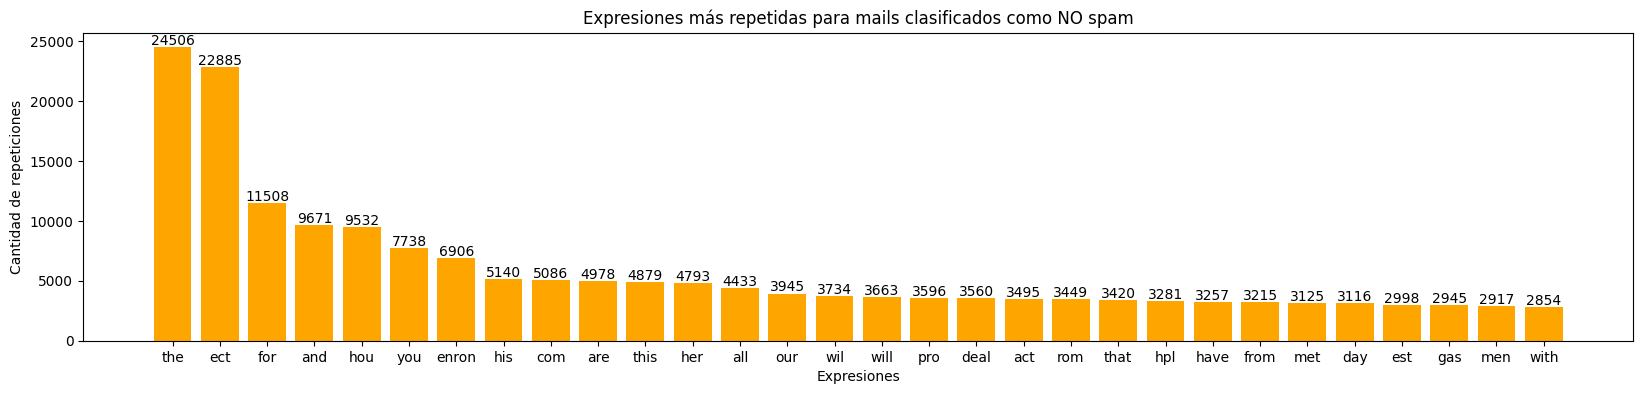

In [236]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.bar(top30_palabras_prediction_0.index, top30_palabras_prediction_0.values, color="orange")

ax.set_xlabel('Expresiones')
ax.set_ylabel('Cantidad de repeticiones')
ax.set_title('Expresiones más repetidas para mails clasificados como NO spam')

labels = top30_palabras_prediction_0.tolist()
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 1100, label, ha="center", va="top"
    )

###Gráfico de correlaciones

Por último, generamos un gráfico de correlaciones. Para esto, calculamos las correlaciones de cada palabra con la palabra 'Prediction', que es el valor que nos interesa y seleccionamos las que tienen un valor de correlación mayor a 0.15 para mostrar las palabras y características que más se relacionan con dicha columna.

In [237]:
corr = df_copia.corr()
corr = corr.abs()
correlaciones = corr['Prediction'] # Selecciono solo los valores de la columna Prediction porque es la que me interesa.
correlaciones

the                       0.004421
ect                       0.120782
and                       0.114364
for                       0.003101
you                       0.130293
                            ...   
dry                       0.006260
Prediction                1.000000
palabras_totales          0.059246
cantidad_palabras_spam    0.301468
longitud_media            0.311500
Name: Prediction, Length: 2851, dtype: float64

In [238]:
correlaciones = correlaciones[correlaciones > 0.15].drop('Prediction') # Selecciono solo las filas con valor mayor a 0.15 y elimino la fila 'Prediction' para realizar el gráfico
correlaciones = correlaciones.reset_index()
correlaciones.columns = ['Columna/Palabra', 'Coeficiente de Correlación']

In [239]:
correlaciones_ordenado = correlaciones.sort_values(by='Coeficiente de Correlación', ascending=False)
correlaciones_ordenado

,Columna/Palabra,Coeficiente de Correlación
87,longitud_media,0.311500
86,cantidad_palabras_spam,0.301468
21,thanks,0.271433
5,hpl,0.266518
37,hanks,0.266070
...,...,...
16,http,0.153025
53,pro,0.152921
81,die,0.152856
58,removed,0.152702


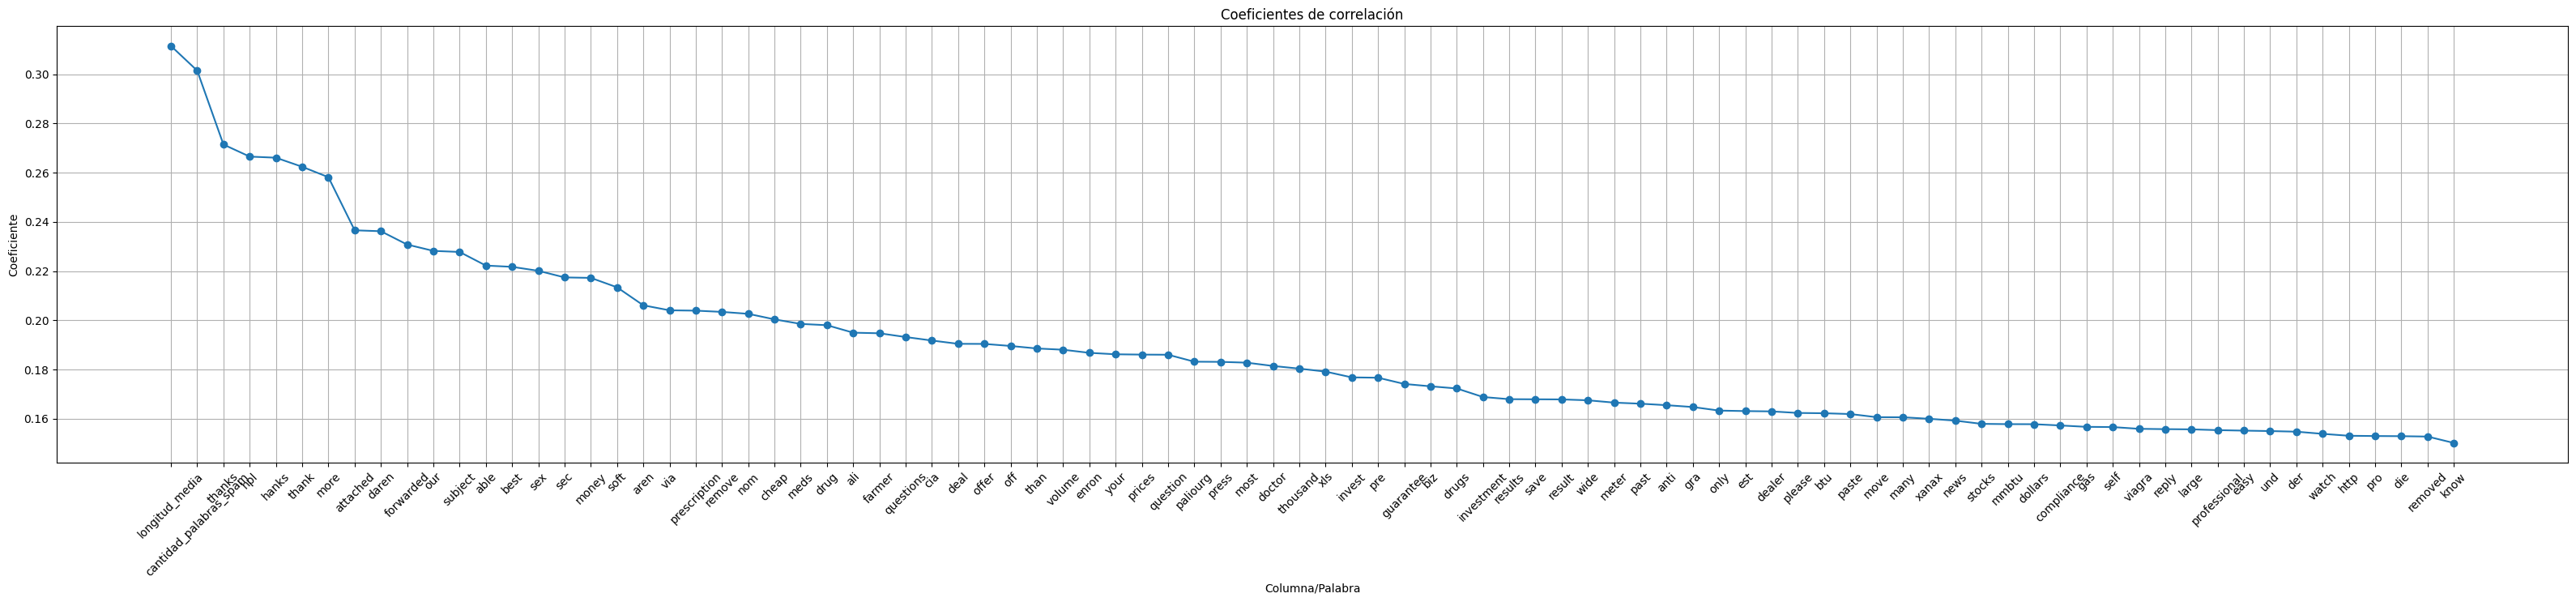

In [240]:
plt.figure(figsize=(40, 7))
plt.plot(correlaciones_ordenado['Columna/Palabra'], correlaciones_ordenado['Coeficiente de Correlación'], marker='o')

# Añadir título y etiquetas a los ejes
plt.title('Coeficientes de correlación')
plt.xlabel('Columna/Palabra')
plt.ylabel('Coeficiente')

# Mostrar las etiquetas del eje x para mejor claridad
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.grid(True)


También podemos representar las mismas correlaciones pero ahora con un scatterplot.

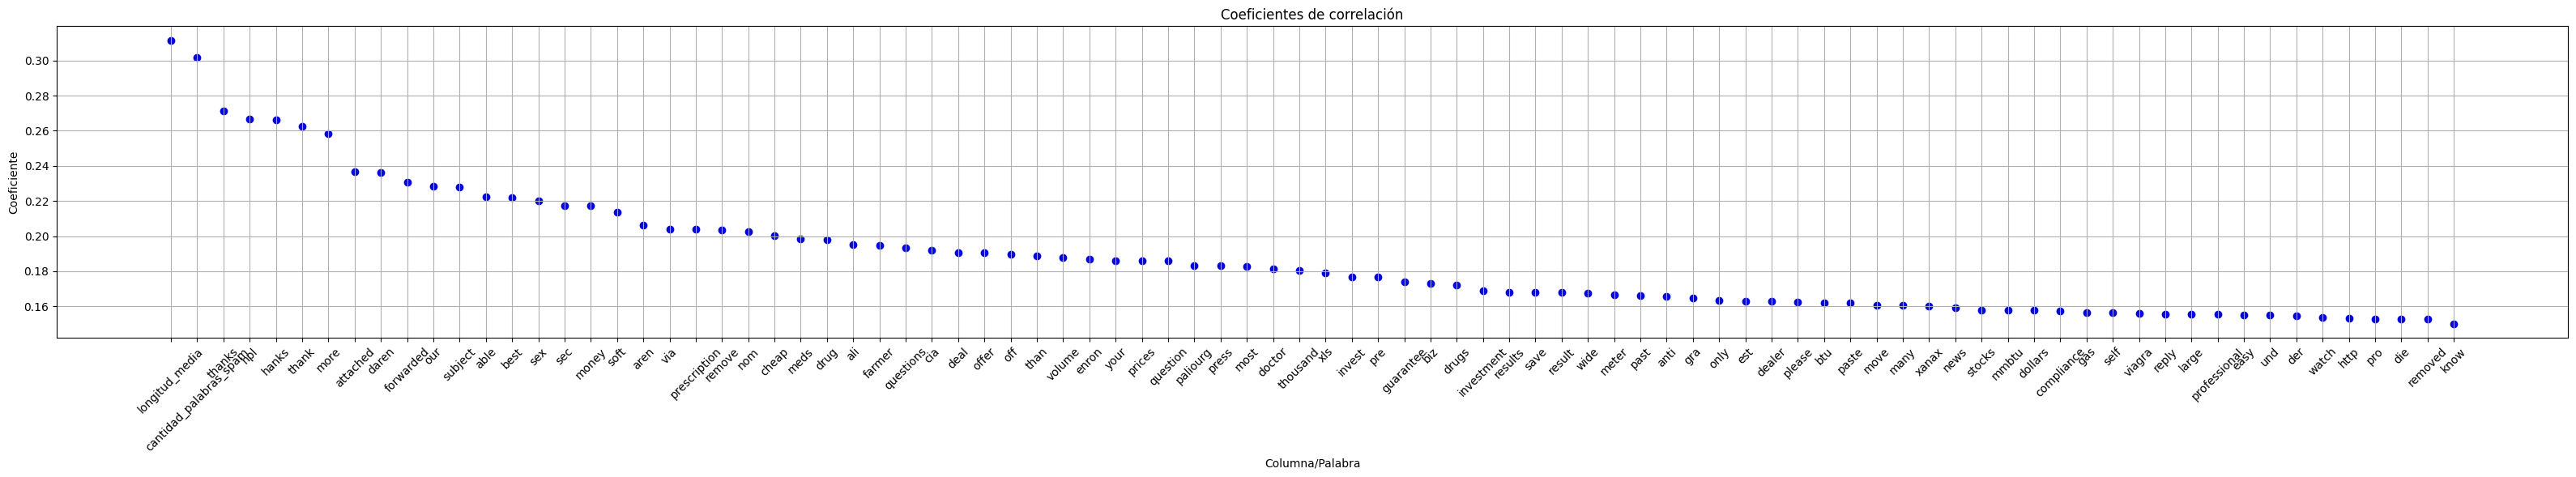

In [241]:
plt.figure(figsize=(40, 5))

plt.scatter(correlaciones_ordenado['Columna/Palabra'], correlaciones_ordenado['Coeficiente de Correlación'], color='b', marker='o')  # 'b' es para azul

plt.title('Coeficientes de correlación')
plt.xlabel('Columna/Palabra')
plt.ylabel('Coeficiente')

plt.xticks(rotation=45)

plt.grid(True)

Estos últimos gráfico de correlaciones nos serán de gran ayuda para nuestra selección de features en los modelos que vamos a aplicar. Basicamente nos muestran cuáles son las columnas que más se relacionan al determinar el valor de la columna 'Prediction'.

#Selección de features

En base al análisis de correlaciones y las columnas añadidas podemos crear la siguiente lista de features que podremos disponer para el uso de distintos modelos.

In [242]:
# Seleccionarmos las 10 columnas que mayor relación tienen con la variable a predecir. Entre esta 10 columnas se encuentran dos de las columnas añadidas inicialmente ("cantidad_palabras_spam" y "longitud_media").

features = correlaciones_ordenado[:10]
features = list(features['Columna/Palabra'])
features

['longitud_media',
 'cantidad_palabras_spam',
 'thanks',
 'hpl',
 'hanks',
 'thank',
 'more',
 'attached',
 'daren',
 'forwarded']

#Entrenamiento y Testeo de Modelos

Dado que nos encontramos frente a un problema de clasificación (predecir un output de 0 o 1) dónde es clara la variable a predecir y con datos etiquetados (columnas de nuestro dataset), es óptimo elegir modelos de entrenamiento supervisado. A lo largo de esta sección, utilizaremos distintos algoritmos de entrenamiento (algunos con más precisión que otros con el objetivo de comparar distintos enfoques) con la meta de poder elegir los features correctos que permitan una mayor eficiencia.

In [243]:
# Importación de librerías a utilizar para la aplicación de modelos.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

##Regresión Lineal Simple

Para evaluar este modelo vamos a utilizar las 10 features seleccionadas anteriormente. Como es una regresión simple, vamos a comparar este modelo utilizando 1 feature por vez. Usaremos el coeficiente de determinación (r2) para evaluar las predicciones.

In [244]:
lista_r2 = []
lista_pendiente = []
lista_interceptos = []
lista_columnas = features

for columna in lista_columnas:
  X = np.array(df_copia[columna]).reshape(-1,1)  # Variable independiente
  y = np.array(df_copia["Prediction"]).reshape(-1,1)      # Variable target
  # Crear el modelo de regresión lineal
  modelo = LinearRegression()
  # Separar los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Ajustar un modelo de regresión lineal usando solo los datos de entrenamiento
  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  # Predecir valores para nuevos datos
  y_pred = modelo.predict(X_test)
  lista_r2.append(r2_score(y_test, y_pred))

for i in range(len(lista_r2)):
  print("Feature: " + lista_columnas[i] + ", r2: " + str(lista_r2[i]))


Feature: longitud_media, r2: 0.10564298214376733
Feature: cantidad_palabras_spam, r2: 0.09944917226307415
Feature: thanks, r2: 0.06816463165556208
Feature: hpl, r2: 0.0780712920958101
Feature: hanks, r2: 0.07125960086534677
Feature: thank, r2: 0.06675377707412311
Feature: more, r2: 0.08148208537628532
Feature: attached, r2: 0.06317840330437308
Feature: daren, r2: 0.04498426056196736
Feature: forwarded, r2: 0.05007351079683764


Podemos ver que ninguna de las features utilizada supera el coeficiente de 0.11, por lo que podemos afirmar que este modelo no es eficiente para este tipo de problema de clasificación.

##Regresión Lineal Múltiple

En este caso aplicaremos también un modelo de regresión lineal, pero ahora utilizando los distintos features al mismo tiempo y ver si obtenemos una mayor precisión para predecir.

In [245]:
X = df_copia[features]  # Características
y = df_copia['Prediction']  # Variable objetivo

modelo = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo.fit(X_train, y_train)

pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print("Pendiente: " + str(pendiente) + ", Intercepto: " + str(intercepto))

y_pred = modelo.predict(X_test)

from sklearn.metrics import r2_score

print("r2: " + str(r2_score(y_test, y_pred)))

Pendiente: -0.3868614313254157, Intercepto: 1.9962374748623195
r2: 0.372498073383152


En este caso logramos obtener una mejora significativa en cuanto al coeficente r2, lo que implica que se obtuvo un aumento en la eficiencia del modelo. Sin embargo, este valor sigue siendo muy bajo para poder considerar a este modelo como óptimo para nuestro problema de clasificación.

##Regresión Logística

Este modelo, a priori, parece ser el más indicado para este tipo de problemas de clasificación, ya que se utiliza para predecir outputs entre dos valores (en este caso 0 y 1).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud del Modelo: 0.8792270531400966
Matriz de Confusión:
 [[665  74]
 [ 51 245]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       739
           1       0.77      0.83      0.80       296

    accuracy                           0.88      1035
   macro avg       0.85      0.86      0.86      1035
weighted avg       0.88      0.88      0.88      1035



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

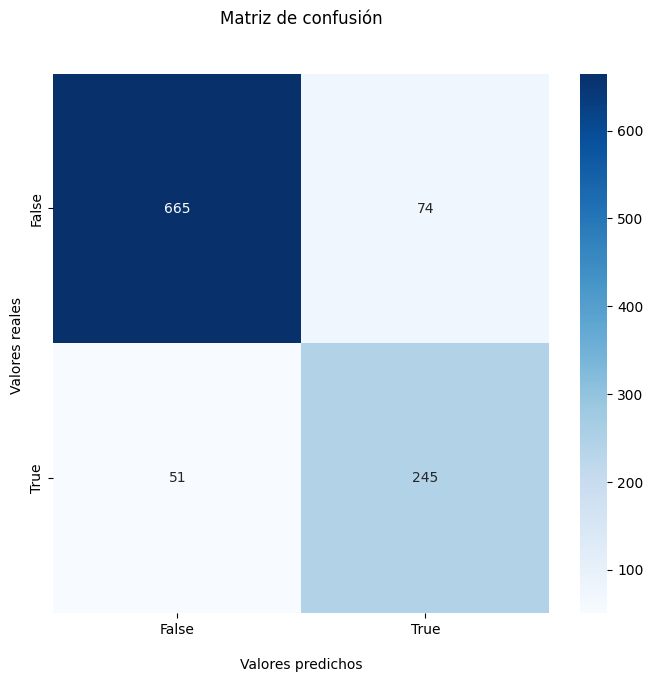

In [246]:
X = df_copia[features]  # Características
y = df_copia['Prediction']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_regresion_logistica = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimo coeficientes
print(f"Exactitud del Modelo: {accuracy_regresion_logistica}")
print("Matriz de Confusión:\n", conf_matrix)
print("Informe de Clasificación:\n", class_report)

# Grafico la matriz de confusión
plt.figure(figsize=(8, 7))
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Podemos ver que el modelo tiene una precisión de 93% para predecir no spam y una precisión de 77% para predecir spam, así como también una exactitud de 87% en general.

También vemos estos valores representados en la matriz de confusión, observando que para el caso de mails que son spam, el modelo predice 245 correctamente sobre un total de 296. Para el caso de mails que no son spam, el modelo predice correctamente 665 mails sobre un total de 739.

Podemos afirmar claramente que hasta ahora este es el modelo que mejor se adapta a nuestro problema de clasificación y el que más exactitud tiene en base a los features seleccionados.

##Naive Bayes

Este modelo es común en aplicaciones de clasificación de texto (podemos definir nuestro problema dentro de este tipo de clasificación). Debido a esto, podríamos intuir que tendrá buena exactitud para nuestras features y variable a predecir.

Exactitud del Modelo: 0.7545893719806763
Matriz de Confusión:
 [[488 251]
 [  3 293]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79       739
           1       0.54      0.99      0.70       296

    accuracy                           0.75      1035
   macro avg       0.77      0.83      0.75      1035
weighted avg       0.86      0.75      0.77      1035



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

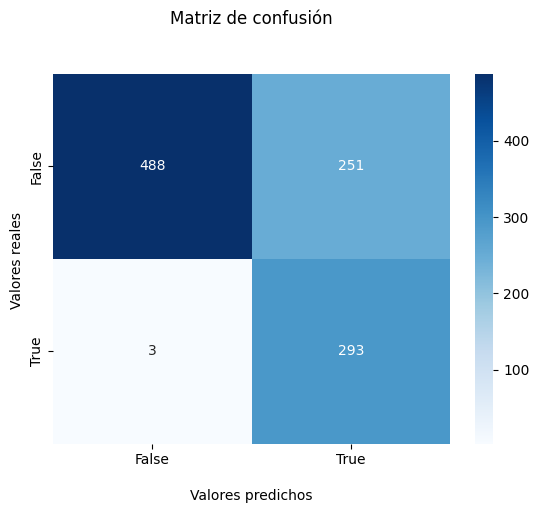

In [247]:
X = df_copia[features]  # Características
y = df_copia['Prediction']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Crear una instancia del modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
nb_model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Exactitud del Modelo: {accuracy_naive_bayes}")
print("Matriz de Confusión:\n", conf_matrix)
print("Informe de Clasificación:\n", class_report)

# Graficamos la matriz de confusión
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Si bien vemos que el modelo tiene una exactitud relativamente buena de 75%, vemos que para el caso de predicción de spam tiene una precisión de 54%, mucho más bajo que en la regresión logística.

También vemos esta diferencia respecto al modelo anterior en la matriz de confusión, ya que de los 739 mails que no son spam, solo 488 los está prediciendo correctamente.

##Árbol de decisiones

El siguiente modelo a implementar es un árbol de decisiones.

Exactitud del Modelo: 0.8666666666666667
Matriz de Confusión:
 [[669  70]
 [ 68 228]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       739
           1       0.77      0.77      0.77       296

    accuracy                           0.87      1035
   macro avg       0.84      0.84      0.84      1035
weighted avg       0.87      0.87      0.87      1035



[Text(0.6150601486433276, 0.9833333333333333, 'cantidad_palabras_spam <= 0.5\ngini = 0.413\nsamples = 4137\nvalue = [2933, 1204]\nclass = Not Spam'),
 Text(0.3112714664769473, 0.95, 'longitud_media <= 4.055\ngini = 0.289\nsamples = 2852\nvalue = [2353, 499]\nclass = Not Spam'),
 Text(0.1684027777777778, 0.9166666666666666, 'hpl <= 0.5\ngini = 0.495\nsamples = 697\nvalue = [382, 315]\nclass = Not Spam'),
 Text(0.1226016609392898, 0.8833333333333333, 'daren <= 0.5\ngini = 0.427\nsamples = 453\nvalue = [140, 313]\nclass = Spam'),
 Text(0.12031071019473082, 0.85, 'longitud_media <= 3.843\ngini = 0.365\nsamples = 412\nvalue = [99, 313]\nclass = Spam'),
 Text(0.058848797250859106, 0.8166666666666667, 'longitud_media <= 3.718\ngini = 0.227\nsamples = 215\nvalue = [28, 187]\nclass = Spam'),
 Text(0.03865979381443299, 0.7833333333333333, 'longitud_media <= 3.668\ngini = 0.14\nsamples = 132\nvalue = [10, 122]\nclass = Spam'),
 Text(0.036368843069874, 0.75, 'longitud_media <= 3.65\ngini = 0.16\ns

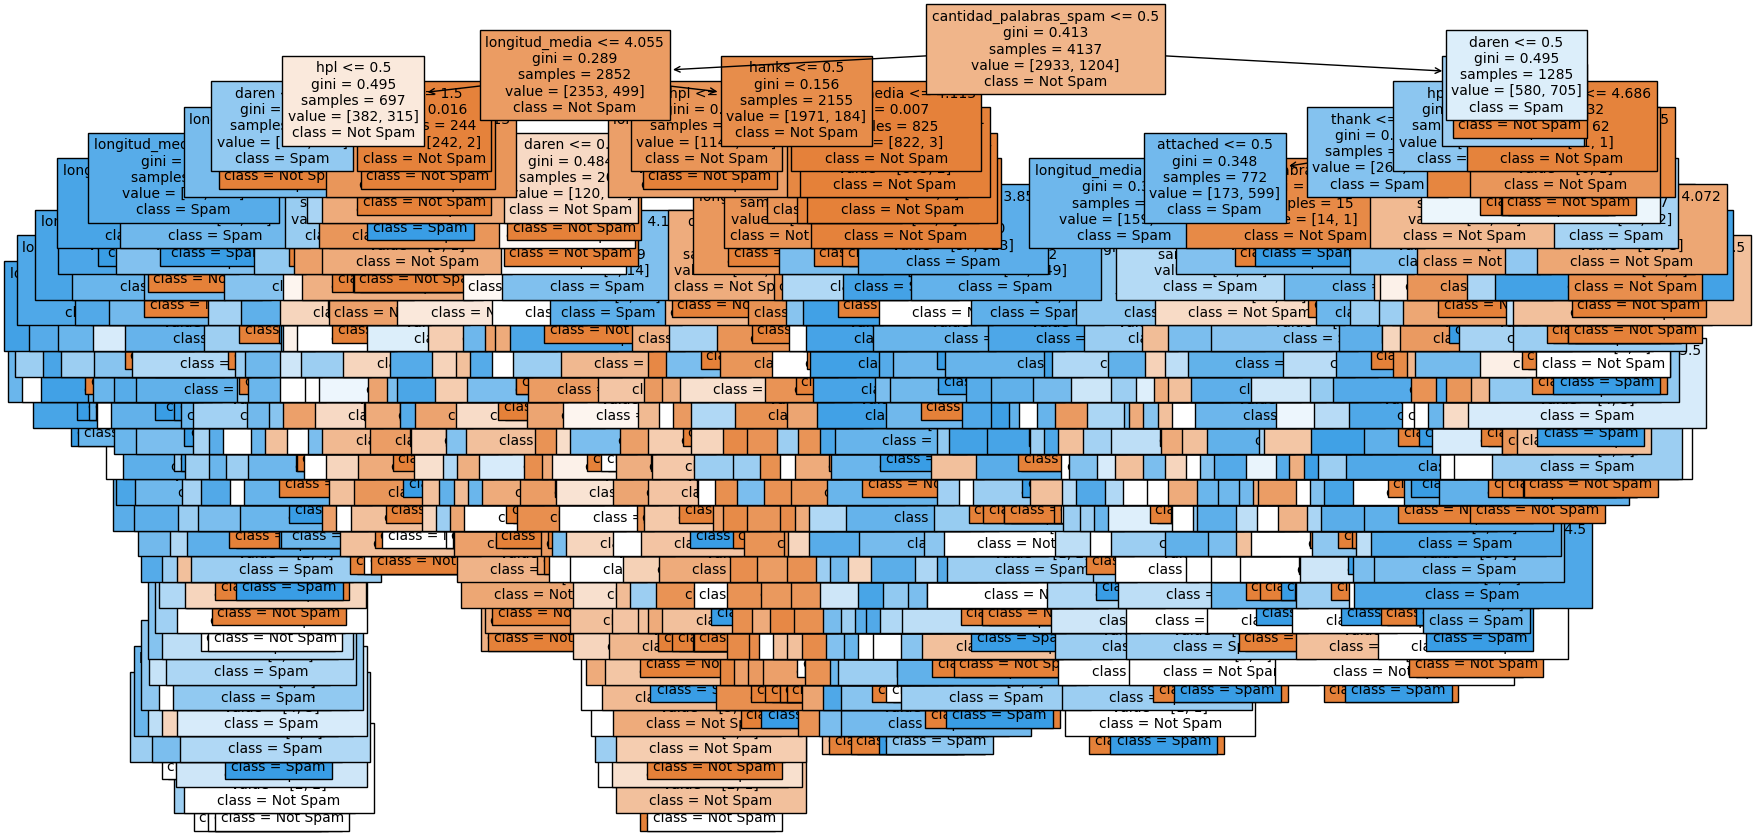

In [248]:
X = df_copia[features]  # Características
y = df_copia['Prediction']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de árboles de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
accuracy_decission_tree = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Exactitud del Modelo: {accuracy_decission_tree}")
print("Matriz de Confusión:\n", conf_matrix)
print("Informe de Clasificación:\n", class_report)

# Graficamos el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names=features,
          class_names=['Not Spam', 'Spam'],
          filled=True,
          impurity=True,
          fontsize=10)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

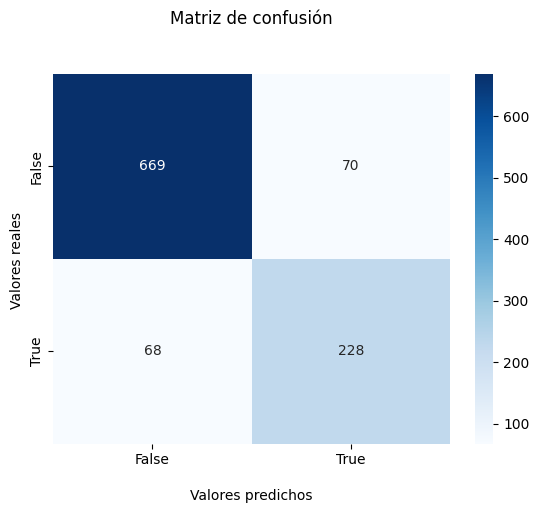

In [249]:
# Graficamos la matriz de confusión
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Podemos ver que este modelo nos da un gran resultado para nuestro caso con una exactitud de 86%, una precisión de 91% para no spam y de 77% para spam. Sin embargo, por la cantidad de features que estamos utilizando, el gráfico del árbol tiene muchos nodos.

Podemos reducir la cantidad de nodos usando una sola feature a costa de perder exactitud. Por ejemplo, podemos utilizar solo la columna "cantidad_palabras_spam".

Exactitud del Modelo: 0.7603864734299517
Matriz de Confusión:
 [[677  62]
 [186 110]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       739
           1       0.64      0.37      0.47       296

    accuracy                           0.76      1035
   macro avg       0.71      0.64      0.66      1035
weighted avg       0.74      0.76      0.74      1035



[Text(0.20833333333333334, 0.9545454545454546, 'cantidad_palabras_spam <= 0.5\ngini = 0.413\nsamples = 4137\nvalue = [2933, 1204]\nclass = Not Spam'),
 Text(0.1527777777777778, 0.8636363636363636, 'gini = 0.289\nsamples = 2852\nvalue = [2353, 499]\nclass = Not Spam'),
 Text(0.2638888888888889, 0.8636363636363636, 'cantidad_palabras_spam <= 1.5\ngini = 0.495\nsamples = 1285\nvalue = [580, 705]\nclass = Spam'),
 Text(0.20833333333333334, 0.7727272727272727, 'gini = 0.494\nsamples = 591\nvalue = [328, 263]\nclass = Not Spam'),
 Text(0.3194444444444444, 0.7727272727272727, 'cantidad_palabras_spam <= 3.5\ngini = 0.463\nsamples = 694\nvalue = [252, 442]\nclass = Spam'),
 Text(0.1111111111111111, 0.6818181818181818, 'cantidad_palabras_spam <= 2.5\ngini = 0.478\nsamples = 361\nvalue = [143, 218]\nclass = Spam'),
 Text(0.05555555555555555, 0.5909090909090909, 'gini = 0.481\nsamples = 234\nvalue = [94, 140]\nclass = Spam'),
 Text(0.16666666666666666, 0.5909090909090909, 'gini = 0.474\nsamples = 

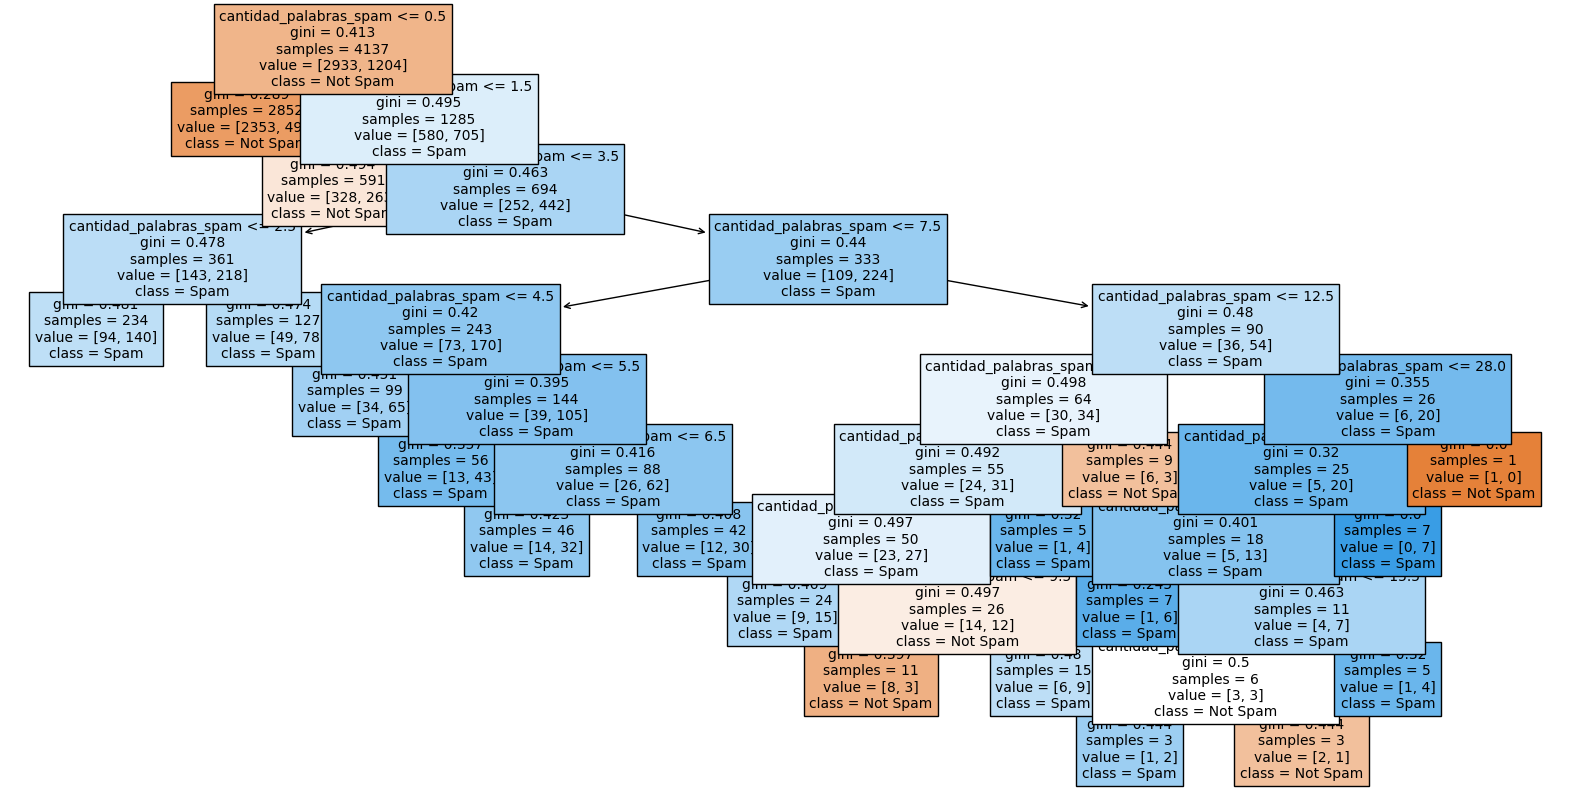

In [250]:
X = df_copia[['cantidad_palabras_spam']]  # Características
y = df_copia['Prediction']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de árboles de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Exactitud del Modelo: {accuracy}")
print("Matriz de Confusión:\n", conf_matrix)
print("Informe de Clasificación:\n", class_report)

# Graficamos el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names=['cantidad_palabras_spam'],
          class_names=['Not Spam', 'Spam'],
          filled=True,
          impurity=True,
          fontsize=10)

De esta manera vemos que la exactitud bajó a 76% y la precisión en casos de spam a 64%, pero reducimos enormemente la cantidad de nodos del árbol.

##KNN

El último modelo que se va a presentar es el KNN. Para la utilización del mismo, debemos elegir un valor arbitrario 'k'. Para esto, vamos a probar con distintos valores de k en el rango entre 1 y 26 y evaluar cuál tiene más precisión.

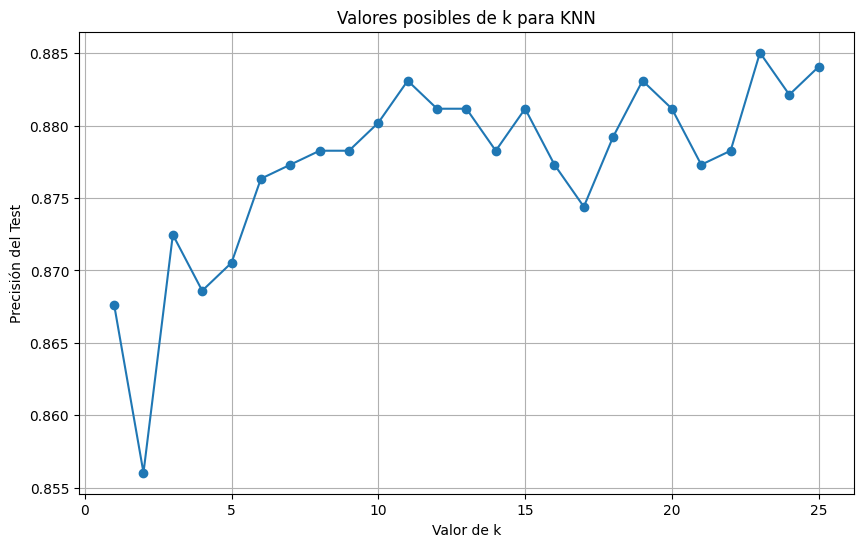

In [251]:
X = df_copia[features]
y = df_copia['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rango de k que queremos probar
k_values = range(1, 26)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('Valores posibles de k para KNN')
plt.xlabel('Valor de k')
plt.ylabel('Precisión del Test')
plt.grid(True)
plt.show()

Obervamos que la mayor precisión se da para k=23, por lo que procedemos a utilizar este valor.

Accuracy: 0.89
[0 0 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       739
           1       0.77      0.85      0.81       296

    accuracy                           0.89      1035
   macro avg       0.85      0.88      0.86      1035
weighted avg       0.89      0.89      0.89      1035



Text(0.5, 1.0, 'Matriz de confusión')

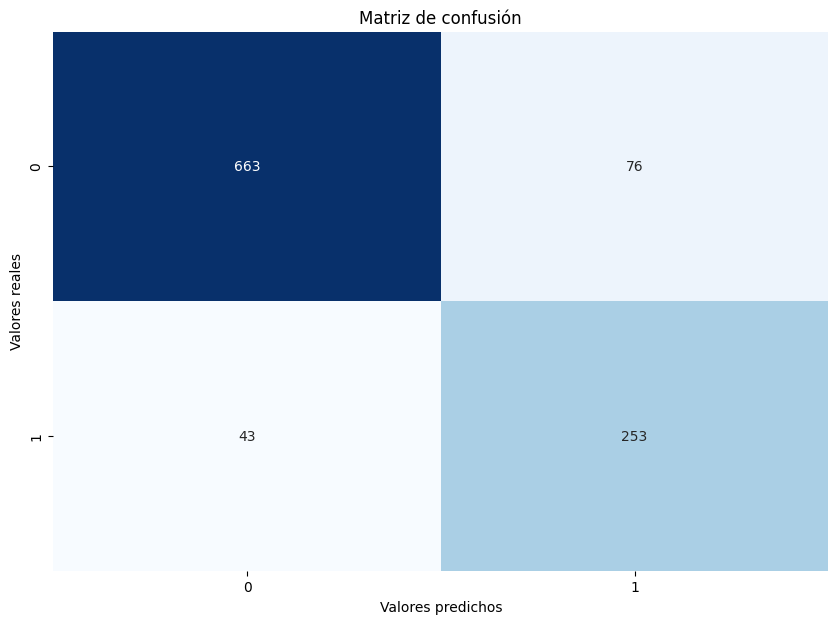

In [252]:
X = df_copia[features]
y = df_copia['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Calcular la precisión
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn:.2f}")
print(y_pred)

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred)
print(report)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')

KNN resulta ser también un modelo eficiente para nuestro problema. Obtenemos una exactitud de 89%, dónde tenemos una precisión de 94% para predecir no spam y 77% para predecir spam.

#Conclusión

Luego de evaluar diferentes modelos, podemos concluir en que tanto la regresión lineal simple como múltiple no son efectivos para nuestro problema de clasificación, obteniendo un r2 muy bajo.

En cuanto al resto de modelos, podemos resumir los siguientes resultados respecto a la exactitud:

In [253]:
print("Regresión Logística: " + str(accuracy_regresion_logistica))
print("Naive Bayes: " + str(accuracy_naive_bayes))
print("Árbol de decisiones: " + str(accuracy_decission_tree))
print("KNN: " + str(accuracy_knn))

Regresión Logística: 0.8792270531400966
Naive Bayes: 0.7545893719806763
Árbol de decisiones: 0.8666666666666667
KNN: 0.885024154589372


Estos cuatro modelos muestran una exactitud alta para nuestro problema de clasificación. Sin embargo, es necesario tener en cuenta que algunos representan más precisión para predecir solo mails de spam, o viceversa.

Por ejemplo, KNN parece ser bastante equilibrado con 94% de precisión de no spam y 77% de precisión de spam, mientras que el modelo de Bayes muestra una gran precisión de 99% para spam pero solo 54% para no spam.

El árbol de decisiones también tiene una buena exactitud de 86%, pero es importante tener en cuenta para este caso la cantidad de nodos del árbol los cuáles pueden determinar la performance del modelo.

En cuánto a la regresiónm logística, también demuestra ser un modelo equilibrado con un 93% de precisión para no spam y 77% de precisión para spam.

La elección del modelo óptimo no va a depender únicamente de las métricas de rendimiento generales como la exactitud, sino también de cómo estos modelos se alinean con los objetivos específicos del negocio y las expectativas del cliente. Por ejemplo, en situaciones donde minimizar los falsos positivos es crucial, un modelo con alta precisión para una clase específica podría ser más beneficioso a pesar de una exactitud general más baja.

Por lo tanto, es esencial realizar una evaluación cuidadosa que considere no solo las métricas estadísticas, sino también la aplicabilidad práctica del modelo en el entorno empresarial específico. Esto asegurará que la solución elegida no solo sea técnicamente competente, sino que también proporcione el máximo valor estratégico y satisfacción al cliente.